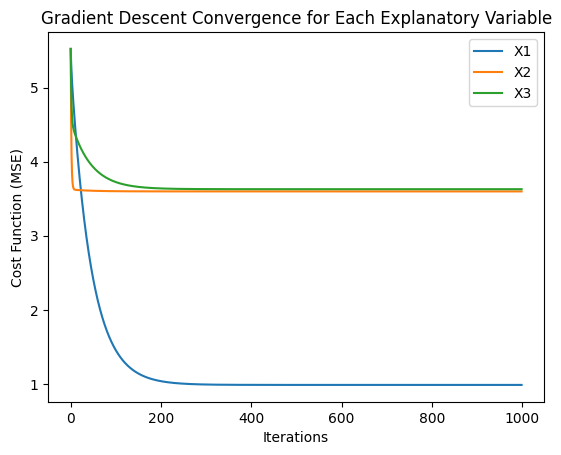

Feature: X1, Theta: -2.0383, Bias: 5.9279
Feature: X2, Theta: 0.5576, Bias: 0.7361
Feature: X3, Theta: -0.5205, Bias: 2.8714


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'C:/Users/ahosain/Downloads/D3.csv'
df = pd.read_csv(file_path)

# Gradient Descent Implementation
def gradient_descent(X, Y, learning_rate=0.05, iterations=1000):
    
    m = len(Y)  # Number of data points
    theta = 0  # Initialize theta to zero
    bias = 0  # Initialize bias to zero

    theta_history = []
    cost_history = []

    for _ in range(iterations):
        predictions = theta * X + bias
        error = predictions - Y

        # Compute gradients
        gradient_theta = (1 / m) * np.dot(error, X)
        gradient_bias = (1 / m) * np.sum(error)

        # Update parameters
        theta -= learning_rate * gradient_theta
        bias -= learning_rate * gradient_bias

        # Compute cost function 
        cost = (1 / (2 * m)) * np.sum(error ** 2)

        theta_history.append((theta, bias))
        cost_history.append(cost)

    return theta, bias, theta_history, cost_history

# Run regression 
learning_rate = 0.05
iterations = 1000

results = {}
for feature in ["X1", "X2", "X3"]:
    X = df[feature].values
    Y = df["Y"].values

    theta, bias, theta_history, cost_history = gradient_descent(X, Y, learning_rate, iterations)
    results[feature] = {"theta": theta, "bias": bias, "cost_history": cost_history}

    # Plot cost function over iterations
    plt.plot(range(iterations), cost_history, label=feature)

plt.xlabel("Iterations")
plt.ylabel("Cost Function (MSE)")
plt.title("Gradient Descent Convergence for Each Explanatory Variable")
plt.legend()
plt.show()

# Display final parameters
for feature, result in results.items():
    print(f"Feature: {feature}, Theta: {result['theta']:.4f}, Bias: {result['bias']:.4f}")


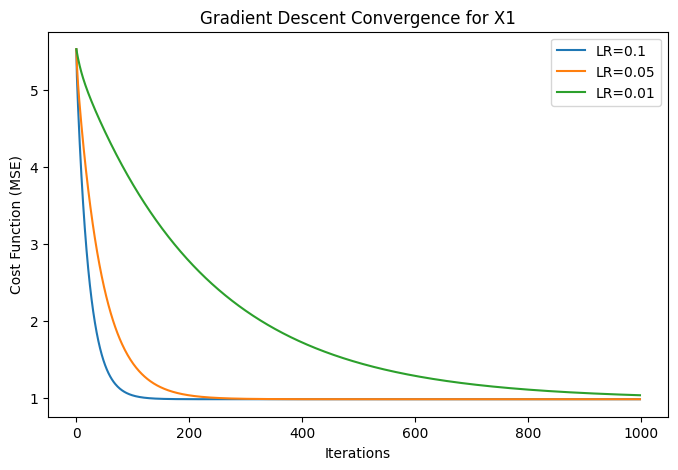

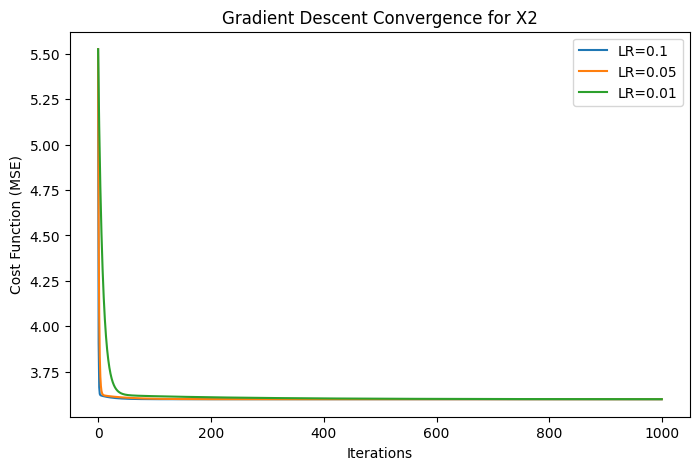

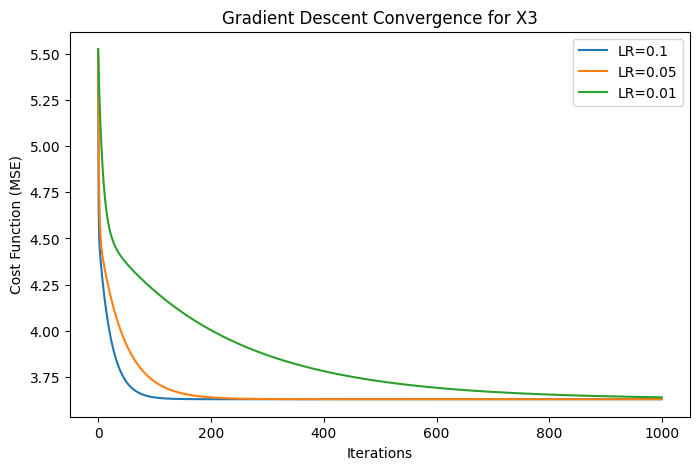


Feature: X1
  Learning Rate: 0.1, Theta: -2.0383, Bias: 5.9279
  Learning Rate: 0.05, Theta: -2.0383, Bias: 5.9279
  Learning Rate: 0.01, Theta: -1.7912, Bias: 5.2929

Feature: X2
  Learning Rate: 0.1, Theta: 0.5576, Bias: 0.7361
  Learning Rate: 0.05, Theta: 0.5576, Bias: 0.7361
  Learning Rate: 0.01, Theta: 0.5767, Bias: 0.6870

Feature: X3
  Learning Rate: 0.1, Theta: -0.5205, Bias: 2.8714
  Learning Rate: 0.05, Theta: -0.5205, Bias: 2.8714
  Learning Rate: 0.01, Theta: -0.4097, Bias: 2.5912


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'C:/Users/ahosain/Downloads/D3.csv'
df = pd.read_csv(file_path)

# Gradient Descent Implementation
def gradient_descent(X, Y, learning_rate, iterations=1000):
    
    m = len(Y)  # Number of data points
    theta = 0  # Initialize theta to zero
    bias = 0  # Initialize bias to zero

    cost_history = []

    for _ in range(iterations):
        predictions = theta * X + bias
        error = predictions - Y

        # Compute gradients
        gradient_theta = (1 / m) * np.dot(error, X)
        gradient_bias = (1 / m) * np.sum(error)

        # Update parameters
        theta -= learning_rate * gradient_theta
        bias -= learning_rate * gradient_bias

        # Compute cost function 
        cost = (1 / (2 * m)) * np.sum(error ** 2)
        cost_history.append(cost)

    return theta, bias, cost_history

# different learning rates 
learning_rates = [0.1, 0.05, 0.01]
iterations = 1000

# Store results 
results = {}

for feature in ["X1", "X2", "X3"]:
    X = df[feature].values
    Y = df["Y"].values

    results[feature] = {}

    plt.figure(figsize=(8, 5))

    for lr in learning_rates:
        theta, bias, cost_history = gradient_descent(X, Y, learning_rate=lr, iterations=iterations)
        results[feature][lr] = {"theta": theta, "bias": bias, "cost_history": cost_history}

        
        plt.plot(range(iterations), cost_history, label=f"LR={lr}")

    plt.xlabel("Iterations")
    plt.ylabel("Cost Function (MSE)")
    plt.title(f"Gradient Descent Convergence for {feature}")
    plt.legend()
    plt.show()

# Display final parameters for each learning rate
for feature, lr_results in results.items():
    print(f"\nFeature: {feature}")
    for lr, result in lr_results.items():
        print(f"  Learning Rate: {lr}, Theta: {result['theta']:.4f}, Bias: {result['bias']:.4f}")


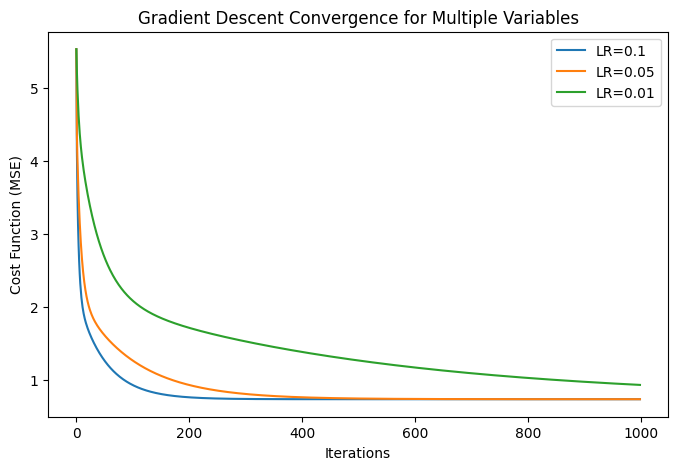


Learning Rate: 0.1
Theta values: [-2.00368658  0.53260157 -0.26556795]
Bias: 5.3139

Learning Rate: 0.05
Theta values: [-1.99876124  0.53836289 -0.26045736]
Bias: 5.2791

Learning Rate: 0.01
Theta values: [-1.73320582  0.84898275  0.0150737 ]
Bias: 3.3993


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
file_path = 'C:/Users/ahosain/Downloads/D3.csv'
df = pd.read_csv(file_path)


X = df[["X1", "X2", "X3"]].values  # Explanatory variables
Y = df["Y"].values  # Dependent variable
m, n = X.shape  # m: number of samples, n: number of features

# Gradient Descent Implementation 
def gradient_descent_multi(X, Y, learning_rate, iterations=1000):
    
    theta = np.zeros(n)  
    bias = 0  
    cost_history = []

    for _ in range(iterations):
        predictions = np.dot(X, theta) + bias
        error = predictions - Y

        # Compute gradients
        gradient_theta = (1 / m) * np.dot(X.T, error)
        gradient_bias = (1 / m) * np.sum(error)

        # Update parameters
        theta -= learning_rate * gradient_theta
        bias -= learning_rate * gradient_bias

        # Compute cost function (Mean Squared Error)
        cost = (1 / (2 * m)) * np.sum(error ** 2)
        cost_history.append(cost)

    return theta, bias, cost_history

# Define different learning rates 
learning_rates = [0.1, 0.05, 0.01]
iterations = 1000

# Store results 
results = {}

plt.figure(figsize=(8, 5))

for lr in learning_rates:
    theta, bias, cost_history = gradient_descent_multi(X, Y, learning_rate=lr, iterations=iterations)
    results[lr] = {"theta": theta, "bias": bias, "cost_history": cost_history}

    
    plt.plot(range(iterations), cost_history, label=f"LR={lr}")

plt.xlabel("Iterations")
plt.ylabel("Cost Function (MSE)")
plt.title("Gradient Descent Convergence for Multiple Variables")
plt.legend()
plt.show()

# Display final parameters for each learning rate
for lr, result in results.items():
    print(f"\nLearning Rate: {lr}")
    print(f"Theta values: {result['theta']}")
    print(f"Bias: {result['bias']:.4f}")


In [10]:
# Define new input values for prediction
new_X = np.array([[1, 1, 1], 
                  [2, 0, 4], 
                  [3, 2, 1]])

# Choose the best learning rate (modify this if needed based on results)
best_lr = 0.05  # Change if another learning rate performed better

# Retrieve the best learned parameters
theta_best = results[best_lr]["theta"]
bias_best = results[best_lr]["bias"]

# Predict using the learned model
predictions = np.dot(new_X, theta_best) + bias_best

# Display predictions
for i, (x1, x2, x3) in enumerate(new_X):
    print(f"Prediction for (x1={x1}, x2={x2}, x3={x3}): y = {predictions[i]:.4f}")


Prediction for (x1=1, x2=1, x3=1): y = 3.5582
Prediction for (x1=2, x2=0, x3=4): y = 0.2397
Prediction for (x1=3, x2=2, x3=1): y = 0.0991
